## Matrix recovery by gradient descent

Suppose we have an n-by-m matrix $A$ which is then distorted by rank-1 noise to produce the new matrix $B = A + q r^\top$ where $q$ and $r$ are random vectors of the appropriate sizes. We will focus on the task of trying to recover the original matrix $A$ given only $B$.

Our objective will be to come up with vectors $q$ and $r$ such that the following loss is minimized:
$$L(q,r) = \lVert B - q r^\top \rVert_{1,1}$$

where $\lVert C \rVert_{1,1} = \sum_{i,j} |C_{ij}|$. Then our best guess for the original matrix $A$ is $B - q r^\top$.

### Q1a
What is the gradient of $L(q,r)$ with respect to $q$? Write your answer in terms of $B$, $q$, and $r$.

$$$$

### Q1b
What is the gradient of $L(q,r)$ with respect to $r$?

### Q2
Write the following Python functions:

In [1]:
def grad_wrt_q(mat, q, r):
    """
    Compute the gradient of L(q,r) with respect to q.
    
    Parameters
    ----------
    mat : numpy.ndarray
        The B matrix described above.
        Shape: [n,m]
    q : numpy.ndarray
        The q vector described above.
        Shape: [n]
    r : numpy.ndarray
        The r vector described above.
        Shape: [m]
        
    Returns
    -------
    grad : numpy.ndarray
        The gradient of L(q,r) with respect to q.
        Shape: [n]
    """
    n, m = mat.shape
    sign_mat = np.sign(np.outer(q,r) - mat)
    grad = np.sum(sign_mat * np.outer(np.ones(n), r), axis = 1)
    return grad


def grad_wrt_r(mat, q, r):
    """
    Compute the gradient of L(q,r) with respect to r.
    
    Parameters
    ----------
    mat : numpy.ndarray
        The B matrix described above.
        Shape: [n,m]
    q : numpy.ndarray
        The q vector described above.
        Shape: [n]
    r : numpy.ndarray
        The r vector described above.
        Shape: [m]
        
    Returns
    -------
    grad : numpy.ndarray
        The gradient of L(q,r) with respect to r.
        Shape: [m]
    """
    n, m = mat.shape
    sign_mat = np.sign(np.outer(q,r) - mat)
    grad = np.sum(sign_mat * np.outer(np.ones(m), r), axis = 0)
    return grad

### Q3
Write a gradient descent step:

In [2]:
def gradient_descent_step(mat, q, r, lr=1e-5):
    """
    Update q and r by gradient descent.
    
    Parameters
    ----------
    mat : numpy.ndarray
        The B matrix described above.
        Shape: [n,m]
    q : numpy.ndarray
        The q vector described above.
        Shape: [n]
    r : numpy.ndarray
        The r vector described above.
        Shape: [m]
    lr : float, optional
        Learning rate.
        
    Returns
    -------
    q : numpy.ndarray
        Updated q vector.
    r : numpy.ndarray
        Updated r vector.
    """
    step_q = grad_wrt_q(mat, q, r)
    steq_r = grad_wrt_r(mat, q, r)
    q = q - step_q * lr
    r = r - step_r * lr
    return q, r

### Q4
The following code loads and displays a corrupted matrix:

img.shape = (1033, 946)


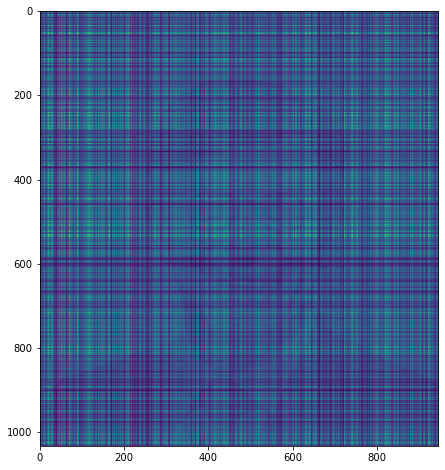

In [4]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg

# Load the image.
img = mpimg.imread("corrupted.jpg")
img = np.mean(img[:,:,:3], axis=2) / np.max(img)
print(f"img.shape = {img.shape}")

plt.subplots(figsize=(8,8))
plt.imshow(img, cmap='viridis')
plt.show()

Note the horizontal and vertical stipes are due to the rank-1 noise introduced by the $q r^\top$ term. Can you guess what the image is?

Now perform gradient descent to recover the corrupted image! Try 50 gradient steps with a learning rate of $10^{-4}$. Then plot the recovered image.